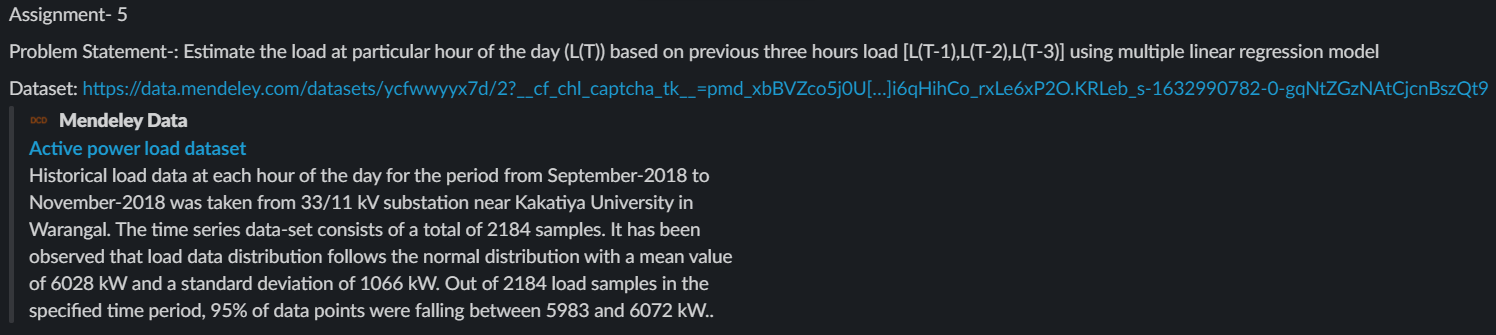

In [1]:
from PIL import Image
img = Image.open('Assignment-5 Q.png')
img

In [2]:
import numpy as np
import math as mt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [3]:
data = pd.read_csv('Assign5.csv')
data.head()

,L(T-3),L(T-2),L(T-1),L(T)
0,5551.82208,4983.17184,4888.39680,5072.95872
1,5196.25980,5641.29720,7153.17732,7849.80504
2,6329.97504,6292.87560,5349.80160,5225.40936
3,5000.47452,4775.53968,6177.05676,6177.05676
4,6155.70120,6212.12976,7424.25264,7407.41760


In [4]:
def normalize(column):
    c_max, c_min = np.max(column), np.min(column)
    for i in range(len(column)):
        column.iloc[i] = (column.iloc[i] - c_min) / (c_max - c_min)
    return c_max, c_min
x1max, x1min = normalize(data['L(T-3)'])
x2max, x2min = normalize(data['L(T-2)'])
x3max, x3min = normalize(data['L(T-1)'])
ymax, ymin = normalize(data['L(T)'])
data.head()

,L(T-3),L(T-2),L(T-1),L(T)
0,0.404337,0.292418,0.264579,0.311219
1,0.338204,0.417655,0.685892,0.821065
2,0.549071,0.541647,0.350413,0.339210
3,0.301789,0.252907,0.504306,0.513938
4,0.516657,0.526281,0.736320,0.739840


In [5]:
data.isnull().sum()

L(T-3)    0
L(T-2)    0
L(T-1)    0
L(T)      0
dtype: int64

In [6]:
X = data [['L(T-3)', 'L(T-2)', 'L(T-1)']]
Y = data ['L(T)']
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.1, random_state=101)

In [7]:
m = [np.random.uniform(-10, 10) for i in range(xtrain.shape[1])]
c = np.random.uniform(-10, 10)
eeta = 0.1
epochs = 500

In [8]:
for _ in range(epochs):
    for i in range(xtrain.shape[0]):
        y, ypred = ytrain.iloc[i], sum([xtrain.iat[i,z] * m[z] for z in range(xtrain.shape[1])]) + c
        gradm = [-1 * xtrain.iat[i,j] * (y - ypred) for j in range(xtrain.shape[1])]
        gradc = -1 * (y - ypred)
        c = c - eeta * gradc
        for j in range(len(m)):
            m[j] = m[j] - eeta * gradm[j]
print(m, c)

[-0.3012118378338312, 0.024976301548293733, 1.0392927758502915] 0.16512777838409198


In [9]:
ytrainPred = []
for x in range(xtrain.shape[0]):
    ytrainPred.append(sum([xtrain.iat[x, z] * m[z] for z in range(xtrain.shape[1])]) + c)
ytestPred = []
for x in range(xtest.shape[0]):
    ytestPred.append(sum([xtest.iat[x, z] * m[z] for z in range(xtest.shape[1])]) + c)

In [10]:
xtrain['L(T-3)'] = xtrain['L(T-3)'] * (x1max - x1min) + x1min
xtrain['L(T-2)'] = xtrain['L(T-2)'] * (x2max - x2min) + x2min
xtrain['L(T-1)'] = xtrain['L(T-1)'] * (x3max - x3min) + x3min
ytrain = ytrain * (ymax - ymin) + ymin
xtest['L(T-3)'] = xtest['L(T-3)'] * (x1max - x1min) + x1min
xtest['L(T-2)'] = xtest['L(T-2)'] * (x2max - x2min) + x2min
xtest['L(T-1)'] = xtest['L(T-1)'] * (x3max - x3min) + x3min
ytest = ytest * (ymax - ymin) + ymin
ytrainPred = np.multiply(ytrainPred, (ymax - ymin)) + ymin
ytestPred = np.multiply(ytestPred, (ymax - ymin)) + ymin

In [11]:
#Compute the error for training and testing data
MAE_Train = mean_absolute_error(ytrainPred, ytrain) #Testing MAE
MSE_Train = mean_squared_error(ytrainPred, ytrain) #Testing MSE
RMSE_Train = mean_squared_error(ytrainPred, ytrain) ** 0.5 #Testing RMSE
MAE_Test = mean_absolute_error(ytestPred, ytest) #Testing MAE
MSE_Test = mean_squared_error(ytestPred, ytest) #Testing MSE
RMSE_Test = mean_squared_error(ytestPred, ytest) ** 0.5 #Testing RMSE
print('Training Error :')
print('Mean Absolute Error :', MAE_Train)
print('Mean Squared Error :', MSE_Train)
print('Root Mean Squared Error :', RMSE_Train)
print('\nTesting Error :')
print('Mean Absolute Error :', MAE_Test)
print('Mean Squared Error :', MSE_Test)
print('Root Mean Squared Error :', RMSE_Test)

Training Error :
Mean Absolute Error : 517.7141466039081
Mean Squared Error : 479616.60423120763
Root Mean Squared Error : 692.5435756912395

Testing Error :
Mean Absolute Error : 452.60788285080395
Mean Squared Error : 362137.931060473
Root Mean Squared Error : 601.7789719327795


In [12]:
xtrain['Y_Train'] = ytrain
xtrain['Y_Train_Prediction'] = ytrainPred
xtrain

,L(T-3),L(T-2),L(T-1),Y_Train,Y_Train_Prediction
318,7153.177320,6303.63132,6235.667640,5727.031200,6115.602822
426,5795.618400,6052.82040,4955.425200,4732.516800,5175.244164
200,5332.654800,5212.62720,3466.147680,5182.230600,3726.543107
255,6626.458800,7493.15160,7047.334800,6073.240680,7161.803911
374,5110.790796,6599.33568,8253.191304,7016.953788,8870.920156
...,...,...,...,...,...
316,6442.208640,5548.54860,5460.476400,5604.197760,5496.716147
393,7613.179200,7561.73880,6494.584320,6197.788800,6280.449215
75,6082.749360,6762.38616,7051.231800,8257.898880,7312.894492
337,4536.575640,4468.61196,4298.702760,3839.947920,4826.878421


In [13]:
xtest['Y_Test'] = ytest
xtest['Y_Test_Prediction'] = ytestPred
xtest

,L(T-3),L(T-2),L(T-1),Y_Test,Y_Test_Prediction
225,5069.685240,4913.96112,7098.77520,8213.31720,7624.228717
18,5619.006360,5384.40696,5052.38256,5277.31740,5313.928328
48,5761.324800,5988.28608,6197.78880,6424.75008,6492.253251
355,5075.452800,4886.83800,4766.81040,4663.92960,5166.195316
350,4543.902000,5115.35808,7419.88800,7611.93216,8128.009402
365,3945.011040,4526.91108,5372.40420,6038.63532,6139.506790
39,6138.554400,6001.38000,5744.48976,5709.88440,5900.160694
398,6315.478200,6748.04520,8132.25960,7777.78848,8379.838076
312,6666.675840,6161.62464,5740.74864,6666.67584,5739.222114
171,5324.860800,7197.91488,8357.19444,8668.64268,8930.611074


In [14]:
#Deployment
x1 = float(input('Enter load at T-3 hours : '))
x2 = float(input('Enter load at T-2 hours : '))
x3 = float(input('Enter load at T-1 hours : '))
x1Norm = (x1 - x1min) / (x1max - x1min)
x2Norm = (x2 - x2min) / (x2max - x2min)
x3Norm = (x3 - x3min) / (x3max - x3min)
yPred = x1Norm * m[0] + x2Norm * m[1] + x3Norm * m[2] + c
y = yPred * (ymax - ymin) + ymin
print('Load at T hour :', y)

Load at T hour : 1509.4551619660492
